In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('movies.csv')
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
data1 = pd.read_csv('movie_metadata.csv')
data1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data1.shape

(5043, 28)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
data1.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
data1.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [8]:
data1['country'].value_counts().head(10)

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Italy          23
Name: country, dtype: int64

In [9]:
data1['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [10]:
data1['genres'].value_counts().head(10)

Drama                          236
Comedy                         209
Comedy|Drama                   191
Comedy|Drama|Romance           187
Comedy|Romance                 158
Drama|Romance                  152
Crime|Drama|Thriller           101
Horror                          71
Action|Crime|Drama|Thriller     68
Action|Crime|Thriller           65
Name: genres, dtype: int64

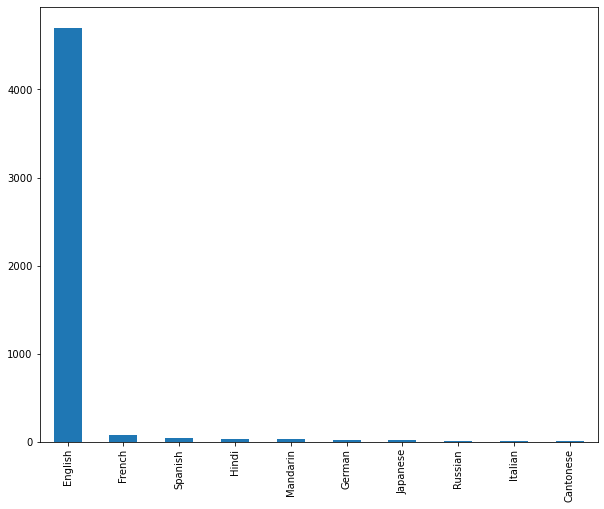

In [11]:
# data1['language'].value_counts().head(10)
plt.figure(figsize=(10,8))
data1['language'].value_counts()[0:10].plot.bar()

In [12]:
round(data1['imdb_score'].mean(),2)

6.44

In [13]:
data1['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [14]:
data1['movie_title'].value_counts().head(10)

Pan                          3
Halloween                    3
Victor Frankenstein          3
The Fast and the Furious     3
Ben-Hur                      3
Home                         3
King Kong                    3
The Full Monty               2
House of Wax                 2
Big Fat Liar                 2
Name: movie_title, dtype: int64

In [15]:
data1['title_year'].value_counts().head(10)

2009.0    260
2014.0    252
2006.0    239
2013.0    237
2010.0    230
2015.0    226
2011.0    225
2008.0    225
2012.0    221
2005.0    221
Name: title_year, dtype: int64

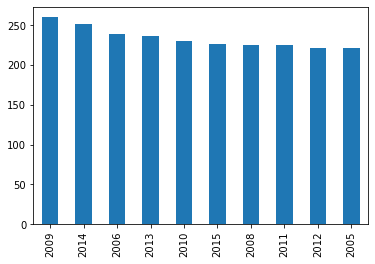

In [16]:
data1['title_year'].fillna(0,inplace=True)
data1['title_year'] = data1['title_year'].apply(np.int64)
data1['title_year'].value_counts()[0:10].plot.bar()

In [17]:
df = data1[['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','genres','title_year']]
df.head()

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,title_year
0,Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,2009
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,2007
2,Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,2015
3,The Dark Knight Rises,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,2012
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,0


In [18]:
df['genres'] = df['genres'].apply(lambda a: str(a).replace('|', ' '))
df['movie_title'] = df['movie_title'].str.lower()
df['director_name'] = df['director_name'].str.lower()
df['actor_1_name'] = df['actor_1_name'].str.lower()
df['actor_2_name'] = df['actor_2_name'].str.lower()
df['actor_3_name'] = df['actor_3_name'].str.lower()
df['genres'] = df['genres'].str.lower()
df.head()

C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,title_year
0,avatar,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci-fi,2009
1,pirates of the caribbean: at world's end,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,2007
2,spectre,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,2015
3,the dark knight rises,christopher nolan,tom hardy,christian bale,joseph gordon-levitt,action thriller,2012
4,star wars: episode vii - the force awakens ...,doug walker,doug walker,rob walker,NaN,documentary,0


In [19]:
df['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [20]:
df['movie_title'] = df['movie_title'].apply(lambda a:a[:-1])
df['movie_title'][1]

C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


"pirates of the caribbean: at world's end"

In [21]:
df['dgr'] = df['director_name']+df['actor_1_name']+df['actor_2_name']+df['actor_3_name']+df['genres']
df.head()

C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,genres,title_year,dgr
0,avatar,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci-fi,2009,james cameroncch pounderjoel david moorewes st...
1,pirates of the caribbean: at world's end,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,2007,gore verbinskijohnny depporlando bloomjack dav...
2,spectre,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,2015,sam mendeschristoph waltzrory kinnearstephanie...
3,the dark knight rises,christopher nolan,tom hardy,christian bale,joseph gordon-levitt,action thriller,2012,christopher nolantom hardychristian balejoseph...
4,star wars: episode vii - the force awakens ...,doug walker,doug walker,rob walker,NaN,documentary,0,NaN


In [22]:
df.fillna('', inplace=True)
df.isnull().sum()

C:\Users\Gaurav\anaconda3\envs\py3-TF2.0\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


movie_title      0
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
title_year       0
dgr              0
dtype: int64

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer()
cv_matrix = cv.fit_transform(df['dgr'])
similarity = cosine_similarity(cv_matrix)

In [61]:
def rec_movie(movie):
#     f = df['movie_title'].str.contains(movie, na=False, case=False)
    movie=movie.lower()
    if movie not in df['movie_title'].unique():
        print("Sorry! movie not in database")

    else:
        m = df.loc[df['movie_title']==movie].index[0]
        lst = list(enumerate(similarity[m]))
        lst = sorted(lst, key=lambda x:x[1], reverse = True)
        lst = lst[1:11]
        l = []
        year = []
        for i in range(len(lst)):
            a = lst[i][0]
            l.append(df['movie_title'][a])
            year.append(df['title_year'][a])
        df1 = pd.DataFrame({'Movie Reommended':l, 'Year': year})
        return l,year
#         return df1

In [62]:
# ip=input('Enter movie name: ')
# ip=ip.lower()
# rec_movie(ip)

Enter movie name: inception


,Movie Reommended,Year
0,g.i. joe: the rise of cobra,2009
1,the dark knight rises,2012
2,i am number four,2011
3,battleship,2012
4,star trek beyond,2016
5,waterworld,1995
6,mad max: fury road,2015
7,armageddon,1998
8,stealth,2005
9,g.i. joe: retaliation,2013


In [60]:
# import pickle
# Pkl_Filename = "Rec.pkl"  

# with open(Pkl_Filename, 'wb') as file:  
#     pickle.dump(rec_movie, file)
# print('model saved')

model saved


In [56]:
# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_LR_Model = pickle.load(file)

# Pickled_LR_Model

<function __main__.rec_movie(movie)>

In [57]:
# Pickled_LR_Model("INCeption")

,Movie Reommended,Year
0,g.i. joe: the rise of cobra,2009
1,the dark knight rises,2012
2,i am number four,2011
3,battleship,2012
4,star trek beyond,2016
5,waterworld,1995
6,mad max: fury road,2015
7,armageddon,1998
8,stealth,2005
9,g.i. joe: retaliation,2013
